# Sentiment Analysis of Financial News Headlines
## This task tests your ability to apply NLP techniques you've learnt to classify a news headline containing financial information into either one of the sentiments (Positive, Negative or Neutral)

### Dataset:
https://raw.githubusercontent.com/subashgandyer/datasets/main/financial_news_headlines_sentiment.csv

## Max Marks without Bonus attempted: 80 points
## Max Marks with Bonus: 100 points
- ### Bonus: 20 points

### Steps
- 1. Download the dataset
- 2. Load the dataset
- 3. Explore the dataset (Exploratory Data Analysis)
- 4. Clean the data
- 5. Apply SMOTE for imbalanced data [Optional] --> Carries Bonus Marks
- 6. Build a BoW model
- 7. Build a Tf-Idf model
- 8. Split train and test data
- 9. Use one ML Classifying algorithm to classify the finanical news headline data
- 10. Use another ML classifying algorithm to classify them
- 11. Plot Confusion matrix 

In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

## 1. Download the dataset [1 point]

Assumption: Using the link to fetch the dataset directly but since downloading has 1 point, including and commenting the code

In [8]:
# import requests
# url = "https://raw.githubusercontent.com/subashgandyer/datasets/main/financial_news_headlines_sentiment.csv"
# response = requests.get(url)
# with open("financial_news_headlines_sentiment.csv", "wb") as f:
#     f.write(response.content)

## 2. Load the dataset [1 point]

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/subashgandyer/datasets/main/financial_news_headlines_sentiment.csv", header=None, encoding = "ISO-8859-1")

In [3]:
df.columns = ["label", "headline"]

## 3. Explore the dataset [10 points]

In [18]:
df.head()

,label,headline
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     4846 non-null   object
 1   headline  4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [19]:
df.shape

(4846, 2)

In [20]:
df.columns

Index(['label', 'headline'], dtype='object')

In [23]:
df.label.unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [21]:
df.describe()

,label,headline
count,4846,4846
unique,3,4838
top,neutral,TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...
freq,2879,2


In [26]:
df["label"].value_counts()

neutral     2879
positive    1363
negative     604
Name: label, dtype: int64

In [22]:
df.isnull().sum()

label       0
headline    0
dtype: int64

## 4. Clean the data [5 points]

In [36]:
df_clean = df.drop_duplicates()

In [25]:
# Checking for entries where headline is same but label is different
groups = df.groupby("headline")
filtered_groups = groups.filter(lambda x: len(x["label"].unique()) > 1)
filtered_groups

,label,headline
78,neutral,TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...
79,positive,TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...
788,positive,The Group 's business is balanced by its broad...
789,neutral,The Group 's business is balanced by its broad...


Assumption: Keeping both the entries as both labels might be correct options for the given headline

## 5. SMOTE (Imbalanced dataset) [OPTIONAL] BONUS [20 points]
Hint: Use **imblearn** library

In [37]:
from sklearn.preprocessing import LabelEncoder
# Apply label encoding to label and headline columns
label_encoder1 = LabelEncoder()
label_encoder2 = LabelEncoder()
df_encoded = pd.DataFrame()
df_encoded['label'] = label_encoder1.fit_transform(df_clean['label'])
df_encoded['headline'] = label_encoder2.fit_transform(df_clean['headline'])

# Split the DataFrame into X (input features) and y (target variable)
X = df_encoded.drop('label', axis=1)
y = df_encoded['label']

# Apply SMOTE to balance the class distribution
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df_int = pd.DataFrame({'label': y_resampled, 'headline': X_resampled['headline']})
df_resampled = pd.DataFrame()
# Convert label and headline columns back to original string values
df_resampled['label'] = label_encoder1.inverse_transform(df_int['label'])
df_resampled['headline'] = label_encoder2.inverse_transform(df_int['headline'])

In [38]:
df_resampled['label'].value_counts()

neutral     2873
negative    2873
positive    2873
Name: label, dtype: int64

## 6. BoW model [15 points]

In [39]:
bow_vectorizer = CountVectorizer()
bow = bow_vectorizer.fit_transform(df_resampled['headline'])

## 7. Tf-idf model [15 points]

In [40]:
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(df_resampled['headline'])

## 8. Split train test data [3 points]

In [42]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow, df_resampled['label'], test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf, df_resampled['label'], test_size=0.2, random_state=42)

## 9. Classification Algorithm [10 points]
- Train
- Predict

In [43]:
# Train and evaluate a Naive Bayes classifier on the BoW model
nb_bow = MultinomialNB()
nb_bow.fit(X_train_bow, y_train_bow)
nb_bow_score = nb_bow.score(X_test_bow, y_test_bow)

In [44]:
# Train and evaluate a Naive Bayes classifier on the Tf-Idf model
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train_tfidf)
nb_tfidf_score = nb_tfidf.score(X_test_tfidf, y_test_tfidf)

## 10. Another Classification Algorithm [10 points]
- Train
- Predict

In [45]:
# Train and evaluate a Logistic Regression classifier on the BoW model
lr_bow = LogisticRegression(max_iter=1000)
lr_bow.fit(X_train_bow, y_train_bow)
lr_bow_score = lr_bow.score(X_test_bow, y_test_bow)

In [46]:
# Train and evaluate a Logistic Regression classifier on the Tf-Idf model
lr_tfidf = LogisticRegression(max_iter=1000)
lr_tfidf.fit(X_train_tfidf, y_train_tfidf)
lr_tfidf_score = lr_tfidf.score(X_test_tfidf, y_test_tfidf)

## 11. Confusion Matrixes for two classification algorithms and two feature extractor methods [10 points]

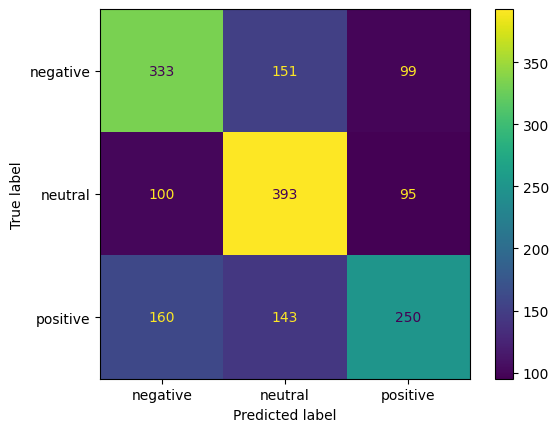

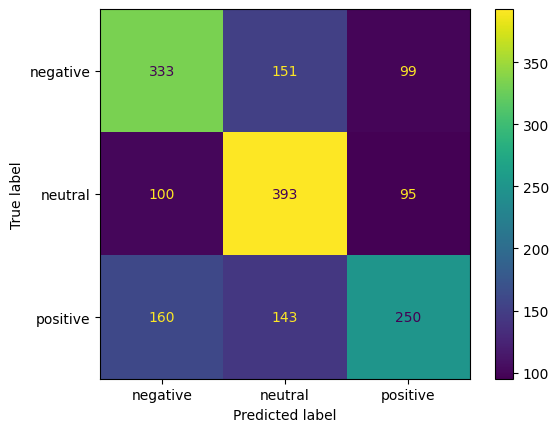

In [47]:
# Plot the confusion matrices for the Naive Bayes classifier for BoW
nb_bow_disp = ConfusionMatrixDisplay.from_estimator(nb_bow, X_test_bow, y_test_bow)
nb_bow_disp.plot()


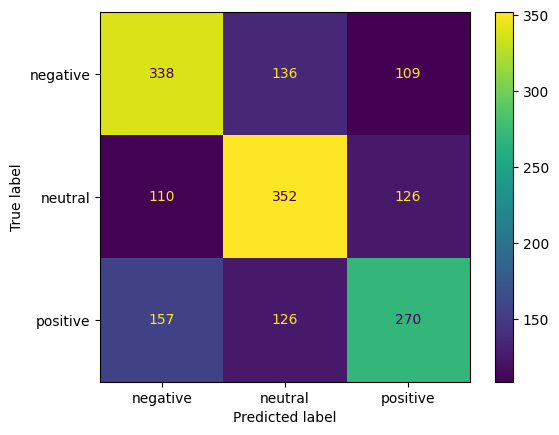

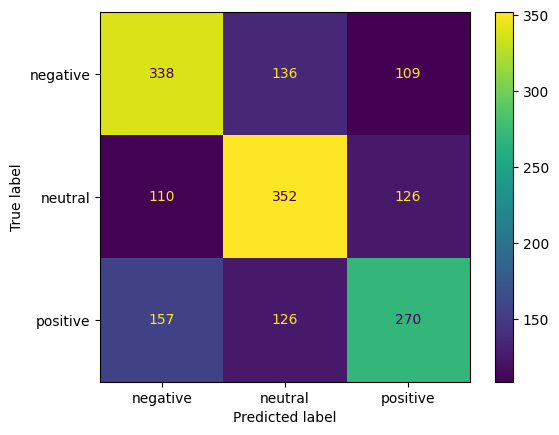

In [48]:
# Plot the confusion matrices for the Naive Bayes classifier for TF-IDF
nb_tfidf_disp = ConfusionMatrixDisplay.from_estimator(nb_tfidf, X_test_tfidf, y_test_tfidf)
nb_tfidf_disp.plot()

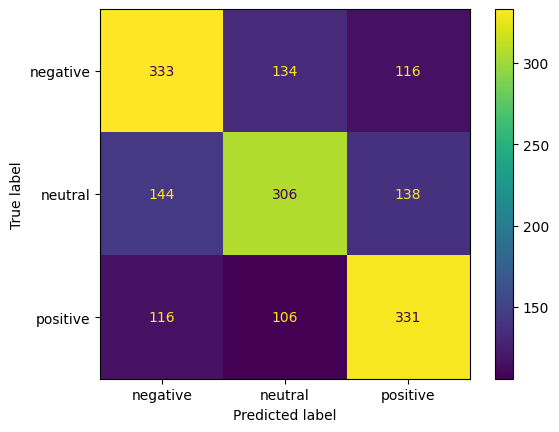

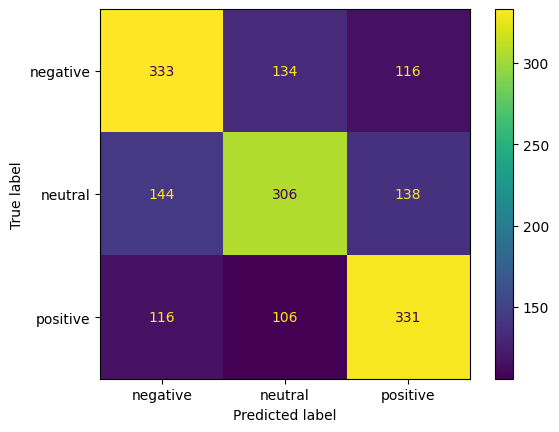

In [49]:
# Plot the confusion matrices for the Logistic Regression classifier for BoW
lr_bow_disp = ConfusionMatrixDisplay.from_estimator(lr_bow, X_test_bow, y_test_bow)
lr_bow_disp.plot()

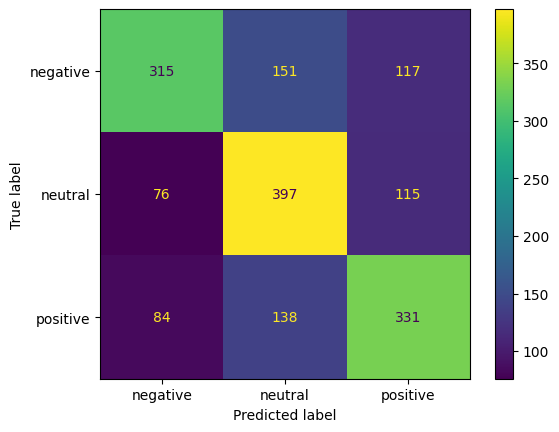

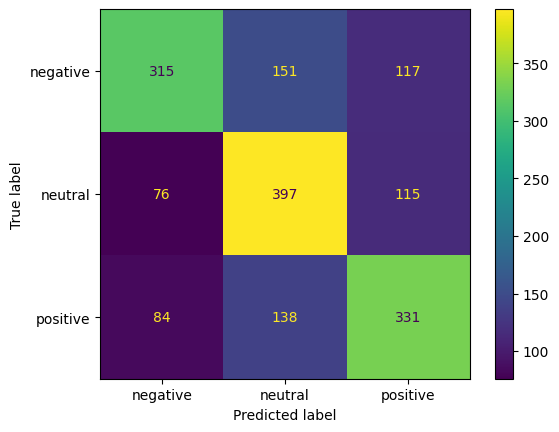

In [50]:
# Plot the confusion matrices for the Logistic Regression classifier for TF-IDF
lr_tfidf_disp = ConfusionMatrixDisplay.from_estimator(lr_tfidf, X_test_tfidf, y_test_tfidf)
lr_tfidf_disp.plot()